# EDA assignment for predicting defaulters and bank intelligence

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np
import matplotlib.pyplot as plt , seaborn as sns
pd.set_option('display.max_columns',80)
pd.set_option('display.max_rows',250)

In [11]:
inp0 = pd.read_csv('application_data.csv')
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
inp1 = pd.read_csv('previous_application.csv')
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
inp0.shape

(307511, 122)

In [14]:
inp0.info

<bound method DataFrame.info of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0        

In [15]:
inp0.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [16]:
inp0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

## Data Cleaning

In [17]:
inp0.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

#### For percentage

In [18]:
round(100*(inp0.isnull().sum()/len(inp0.index)),2).sort_values(ascending=False)

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAPARTMENTS_MEDI        69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
LIVINGAPARTMENTS_MEDI           68.35
FLOORSMIN_AVG                   67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_MEDI                  67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_MODE                66.50
YEARS_BUILD_AVG                 66.50
OWN_CAR_AGE                     65.99
LANDAREA_MEDI                   59.38
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MODE              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

In [19]:
inp0.index

RangeIndex(start=0, stop=307511, step=1)

#### Checking columns having null values more than 30%

In [20]:
cols = inp0.columns[round(100*(inp0.isnull().sum()/len(inp0.index)),2) >= 30.00]
cols

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

#### Dropping columns with more than 30% missing values 

In [21]:
inp0.drop(cols,axis=1,inplace=True)
round(100*(inp0.isnull().sum()/len(inp0.index)),2).sort_values(ascending=False)

EXT_SOURCE_3                   19.83
AMT_REQ_CREDIT_BUREAU_YEAR     13.50
AMT_REQ_CREDIT_BUREAU_QRT      13.50
AMT_REQ_CREDIT_BUREAU_MON      13.50
AMT_REQ_CREDIT_BUREAU_WEEK     13.50
AMT_REQ_CREDIT_BUREAU_DAY      13.50
AMT_REQ_CREDIT_BUREAU_HOUR     13.50
NAME_TYPE_SUITE                 0.42
OBS_30_CNT_SOCIAL_CIRCLE        0.33
DEF_30_CNT_SOCIAL_CIRCLE        0.33
OBS_60_CNT_SOCIAL_CIRCLE        0.33
DEF_60_CNT_SOCIAL_CIRCLE        0.33
EXT_SOURCE_2                    0.21
AMT_GOODS_PRICE                 0.09
FLAG_DOCUMENT_8                 0.00
DAYS_LAST_PHONE_CHANGE          0.00
FLAG_DOCUMENT_2                 0.00
FLAG_DOCUMENT_3                 0.00
FLAG_DOCUMENT_4                 0.00
FLAG_DOCUMENT_5                 0.00
FLAG_DOCUMENT_6                 0.00
FLAG_DOCUMENT_7                 0.00
FLAG_DOCUMENT_12                0.00
FLAG_DOCUMENT_9                 0.00
FLAG_DOCUMENT_10                0.00
FLAG_DOCUMENT_11                0.00
LIVE_CITY_NOT_WORK_CITY         0.00
F

In [22]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [23]:
inp0.nunique().sort_values()

REG_CITY_NOT_LIVE_CITY              2
FLAG_EMAIL                          2
FLAG_DOCUMENT_9                     2
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
FLAG_DOCUMENT_16                    2
FLAG_DOCUMENT_15                    2
FLAG_PHONE                          2
FLAG_DOCUMENT_14                    2
FLAG_DOCUMENT_12                    2
FLAG_DOCUMENT_11                    2
FLAG_DOCUMENT_2                     2
FLAG_DOCUMENT_3                     2
FLAG_DOCUMENT_4                     2
FLAG_DOCUMENT_5                     2
FLAG_DOCUMENT_6                     2
FLAG_DOCUMENT_7                     2
FLAG_DOCUMENT_8                     2
FLAG_DOCUMENT_13                    2
FLAG_CONT_MOBILE                    2
FLAG_DOCUMENT_10                    2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
NAME_CONTRAC

In [24]:
cols1 = inp0.columns[inp0.nunique() <= 55]
inp0[cols1] = inp0[cols1].astype(object)
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  object 
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  object 
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [26]:
inp0['SK_ID_CURR'] = inp0['SK_ID_CURR'].astype(object)

In [27]:
inp0.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307510.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,5.143927e-01,0.510853,-962.858788
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,1.910602e-01,0.194844,826.808487
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,8.173617e-08,0.000527,-4292.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,3.924574e-01,0.370650,-1570.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,5.659614e-01,0.535276,-757.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,6.636171e-01,0.669057,-274.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,0.000000,8.549997e-01,0.896010,0.000000


In [28]:
inp0[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']] = inp0[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE']].apply(abs)
inp0['CLIENT_AGE'] = inp0['DAYS_BIRTH'].apply(lambda x: x//365)
inp0['EMPLOYED_YEARS'] = inp0['DAYS_EMPLOYED'].apply(lambda x: x//365)
inp0.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,EMPLOYED_YEARS
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307510.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,5.143927e-01,0.510853,962.858788,43.435968,185.021521
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,1.910602e-01,0.194844,826.808487,11.954593,381.972190
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,20.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,3.924574e-01,0.370650,274.000000,34.000000,2.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,5.659614e-01,0.535276,757.000000,43.000000,6.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,6.636171e-01,0.669057,1570.000000,53.000000,15.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,8.549997e-01,0.896010,4292.000000,69.000000,1000.000000


In [29]:
inp0.loc[inp0["CODE_GENDER"] == "XNA","CODE_GENDER"] = np.NaN
inp0.loc[inp0["EMPLOYED_YEARS"] < 0,"EMPLOYED_YEARS"] = np.NaN
inp0.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,EMPLOYED_YEARS
count,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,307510.000000,307511.000000,307511.000000
mean,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,5.143927e-01,0.510853,962.858788,43.435968,185.021521
std,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,1.910602e-01,0.194844,826.808487,11.954593,381.972190
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,20.000000,0.000000
25%,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,2010.000000,1720.000000,3.924574e-01,0.370650,274.000000,34.000000,2.000000
50%,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,4504.000000,3254.000000,5.659614e-01,0.535276,757.000000,43.000000,6.000000
75%,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,7479.500000,4299.000000,6.636171e-01,0.669057,1570.000000,53.000000,15.000000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,8.549997e-01,0.896010,4292.000000,69.000000,1000.000000


#### Drop rows with missing values less than 1000

In [30]:
inp0 = inp0[inp0['DAYS_LAST_PHONE_CHANGE'].notna()]
inp0 = inp0[inp0['CNT_FAM_MEMBERS'].notna()]
inp0 = inp0[inp0['CODE_GENDER'].notna()]
inp0 = inp0[inp0['AMT_ANNUITY'].notna()]
inp0 = inp0[inp0['AMT_GOODS_PRICE'].notna()]
inp0 = inp0[inp0['EXT_SOURCE_2'].notna()]
inp0.shape

(306558, 74)

In [31]:
cols = inp0.columns[(100*(inp0.isnull().sum()/len(inp0.index)) <= 13) & (100*(inp0.isnull().sum()/len(inp0.index)) > 0)]
inp0[cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306558 entries, 0 to 307510
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   NAME_TYPE_SUITE           305544 non-null  object
 1   OBS_30_CNT_SOCIAL_CIRCLE  305541 non-null  object
 2   DEF_30_CNT_SOCIAL_CIRCLE  305541 non-null  object
 3   OBS_60_CNT_SOCIAL_CIRCLE  305541 non-null  object
 4   DEF_60_CNT_SOCIAL_CIRCLE  305541 non-null  object
dtypes: object(5)
memory usage: 14.0+ MB


In [32]:
inp0['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      247994
Family              40059
Spouse, partner     11340
Children             3255
Other_B              1762
Other_A               865
Group of people       269
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
inp0[['AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000']] = inp0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']].apply(lambda x: x/1000)
inp0.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,EMPLOYED_YEARS,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000
count,3.065580e+05,3.065580e+05,306558.000000,3.065580e+05,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,3.065580e+05,245891.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000
mean,1.688823e+05,5.996009e+05,27130.275747,5.386705e+05,0.020868,16037.710048,67718.805675,4985.117550,2994.475046,5.143904e-01,0.510808,963.175220,43.437904,185.005258,168.882333,599.600883,27.130276,538.670474
std,2.374471e+05,4.026502e+05,14496.211724,3.695737e+05,0.013832,4363.268432,139438.235164,3522.376487,1509.411676,1.910705e-01,0.194856,826.988602,11.952683,381.957080,237.447060,402.650182,14.496212,369.573745
min,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,20.000000,0.000000,25.650000,45.000000,1.615500,40.500000
25%,1.125000e+05,2.700000e+05,16561.125000,2.385000e+05,0.010006,12414.000000,933.000000,2009.000000,1720.000000,3.924379e-01,0.370650,274.000000,34.000000,2.000000,112.500000,270.000000,16.561125,238.500000
50%,1.485000e+05,5.147775e+05,24930.000000,4.500000e+05,0.018850,15751.000000,2220.000000,4503.000000,3255.000000,5.659722e-01,0.535276,757.000000,43.000000,6.000000,148.500000,514.777500,24.930000,450.000000
75%,2.025000e+05,8.086500e+05,34609.500000,6.795000e+05,0.028663,19681.000000,5707.000000,7477.750000,4299.000000,6.636269e-01,0.669057,1570.000000,53.000000,15.000000,202.500000,808.650000,34.609500,679.500000
max,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,24672.000000,7197.000000,8.549997e-01,0.896010,4292.000000,69.000000,1000.000000,117000.000000,4050.000000,258.025500,4050.000000


## Outliers

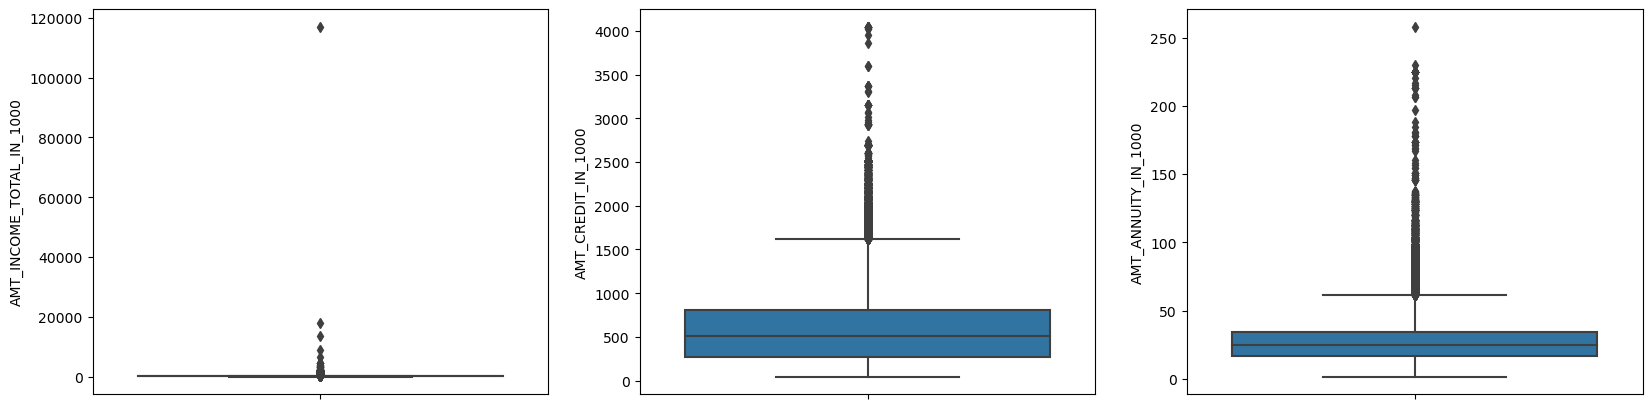

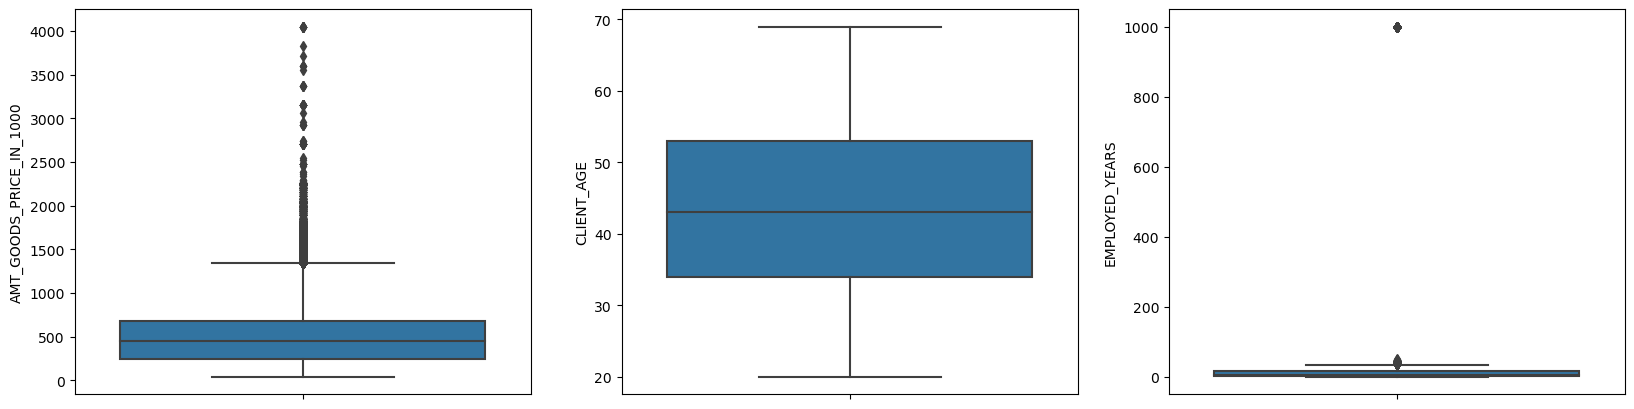

In [34]:
figa, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))
sns.boxplot(y='AMT_INCOME_TOTAL_IN_1000',data=inp0,ax=ax1)
sns.boxplot(y='AMT_CREDIT_IN_1000',data=inp0,ax=ax2)
sns.boxplot(y='AMT_ANNUITY_IN_1000',data=inp0,ax=ax3)

figb, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20, 5))
sns.boxplot(y='AMT_GOODS_PRICE_IN_1000',data=inp0,ax=ax1)
sns.boxplot(y='CLIENT_AGE',data=inp0,ax=ax2)
sns.boxplot(y='EMPLOYED_YEARS',data=inp0,ax=ax3)
plt.show()

In [35]:
inp0[['AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000','EMPLOYED_YEARS']].describe()

,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,EMPLOYED_YEARS
count,306558.000000,306558.000000,306558.000000,306558.000000,306558.000000
mean,168.882333,599.600883,27.130276,538.670474,185.005258
std,237.447060,402.650182,14.496212,369.573745,381.957080
min,25.650000,45.000000,1.615500,40.500000,0.000000
25%,112.500000,270.000000,16.561125,238.500000,2.000000
50%,148.500000,514.777500,24.930000,450.000000,6.000000
75%,202.500000,808.650000,34.609500,679.500000,15.000000
max,117000.000000,4050.000000,258.025500,4050.000000,1000.000000


In [36]:
inp0[['AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000','EMPLOYED_YEARS']].quantile([0.75,0.9,0.95,0.975,0.99,0.999,1])

,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,EMPLOYED_YEARS
0.750,202.5,808.650000,34.60950,679.5,15.0
0.900,270.0,1133.748000,45.95400,1098.0,1000.0
0.950,337.5,1350.000000,53.32500,1305.0,1000.0
0.975,405.0,1574.804363,61.15050,1395.0,1000.0
0.990,472.5,1862.802000,70.01037,1800.0,1000.0
0.999,900.0,2517.300000,110.04750,2250.0,1000.0
1.000,117000.0,4050.000000,258.02550,4050.0,1000.0


#### Binning continuous numeric variable

In [37]:
inp0['CLIENT_AGE_BAND'] = pd.cut(inp0['CLIENT_AGE'],[0,17,25,35,45,55,np.inf])
inp0['EMPLOYED_YEARS)BANNED'] = pd.cut(inp0['EMPLOYED_YEARS'],[-np.inf,2,4,6,10,14,np.inf])
inp0['TOTAL_INCOME_BANNED_IN_1000'] = pd.cut(inp0['AMT_INCOME_TOTAL_IN_1000'],[-np.inf,100,200,300,400,500,np.inf])
inp0['CRDEIT_BANNED_IN_1000'] = pd.cut(inp0['AMT_CREDIT_IN_1000'],[-np.inf,200,400,600,800,1000,np.inf])
inp0['ANNUITY_BANNED_IN_1000'] = pd.cut(inp0['AMT_ANNUITY_IN_1000'],[-np.inf,10,20,30,40,np.inf])
inp0['GOODS_PRICE_BANNED_IN_1000'] = pd.cut(inp0['AMT_GOODS_PRICE_IN_1000'],[-np.inf,200,400,600,800,1000,np.inf])
inp0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,...,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CLIENT_AGE,EMPLOYED_YEARS,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,CLIENT_AGE_BAND,EMPLOYED_YEARS)BANNED,TOTAL_INCOME_BANNED_IN_1000,CRDEIT_BANNED_IN_1000,ANNUITY_BANNED_IN_1000,GOODS_PRICE_BANNED_IN_1000
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,...,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25,1.0,202.5,406.5975,24.7005,351.0,"(17.0, 25.0]","(-inf, 2.0]","(200.0, 300.0]","(400.0, 600.0]","(20.0, 30.0]","(200.0, 400.0]"
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,...,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45,3.0,270.0,1293.5025,35.6985,1129.5,"(35.0, 45.0]","(2.0, 4.0]","(200.0, 300.0]","(1000.0, inf]","(30.0, 40.0]","(1000.0, inf]"
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,...,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,52,0.0,67.5,135.0000,6.7500,135.0,"(45.0, 55.0]","(-inf, 2.0]","(-inf, 100.0]","(-inf, 200.0]","(-inf, 10.0]","(-inf, 200.0]"
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,...,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,52,8.0,135.0,312.6825,29.6865,297.0,"(45.0, 55.0]","(6.0, 10.0]","(100.0, 200.0]","(200.0, 400.0]","(20.0, 30.0]","(200.0, 400.0]"
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,...,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,54,8.0,121.5,513.0000,21.8655,513.0,"(45.0, 55.0]","(6.0, 10.0]","(100.0, 200.0]","(400.0, 600.0]","(20.0, 30.0]","(400.0, 600.0]"


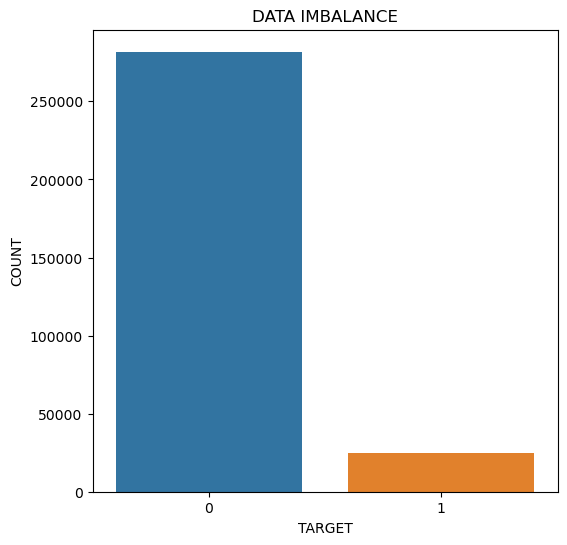


0    281806
1     24752
Name: TARGET, dtype: int64


In [96]:
tgts=inp0.groupby('TARGET').count()['SK_ID_CURR']
fig1,ax=plt.subplots(figsize=(6,6))
ax=sns.barplot(x=tgts.index,y=tgts.values,label='TARGET')
ax.set_xlabel('TARGET')
ax.set_ylabel('COUNT')
ax.set_title('DATA IMBALANCE',fontsize=12)
plt.show()
print()
print(inp0.TARGET.value_counts())

### Bivariate Analysis

##### Blue Target=0, Orange Target=1

In [40]:
inp_0 = inp0[inp0['TARGET'] == 0]
inp_1 = inp0[inp0['TARGET'] == 1]

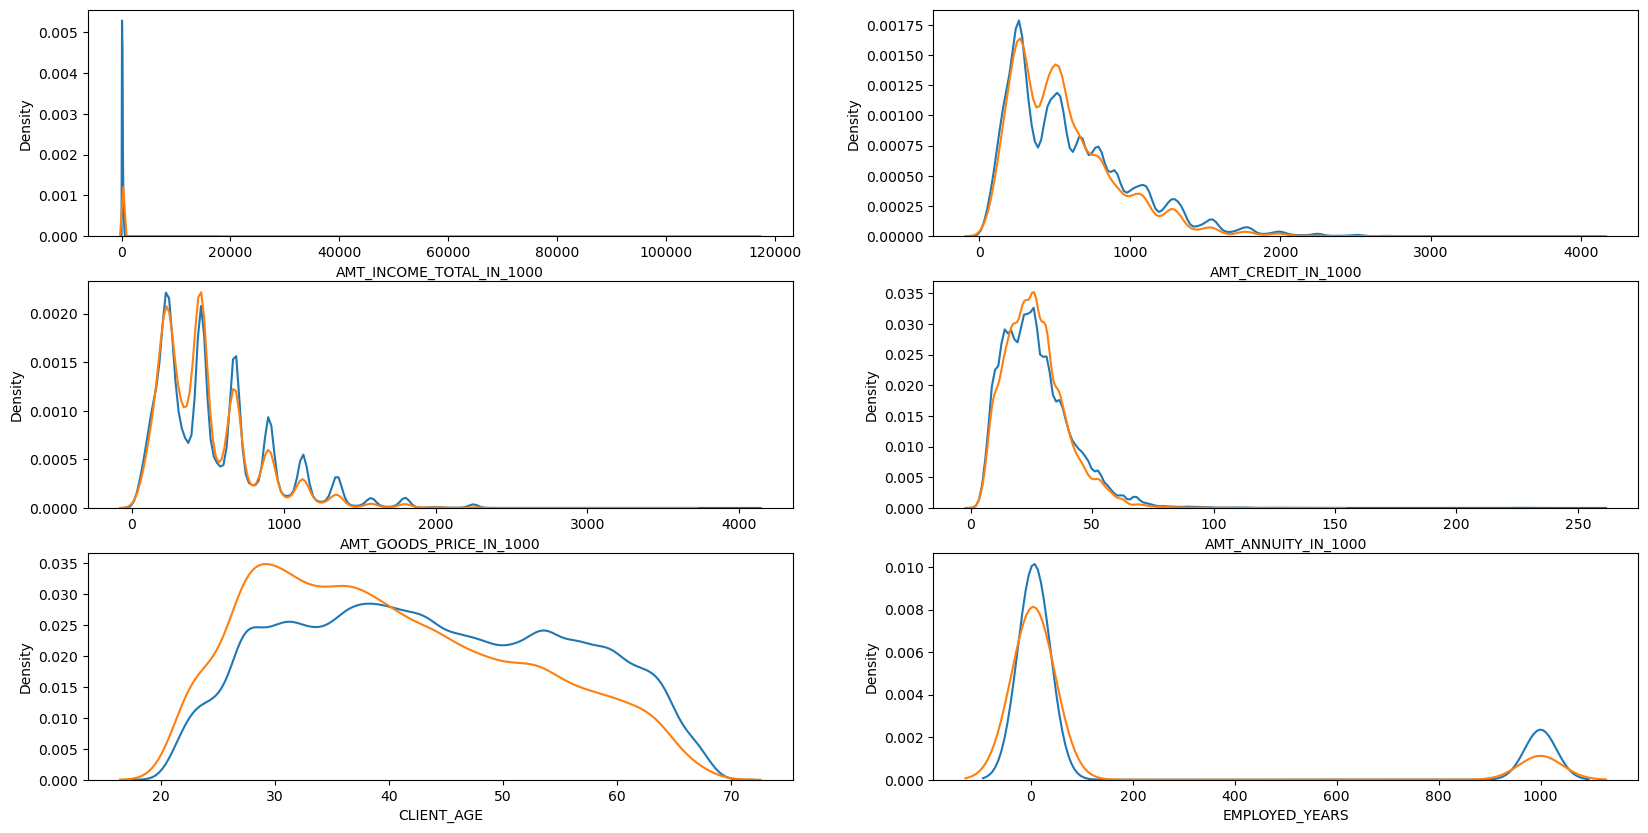

In [41]:
plt.figure(1,figsize=(20,10))

plt.subplot(3,2,1)
sns.distplot(inp_0['AMT_INCOME_TOTAL_IN_1000'],hist=False)
sns.distplot(inp_1['AMT_INCOME_TOTAL_IN_1000'],hist=False)

plt.subplot(3,2,2)
sns.distplot(inp_0['AMT_CREDIT_IN_1000'],hist=False)
sns.distplot(inp_1['AMT_CREDIT_IN_1000'],hist=False)

plt.subplot(3,2,3)
sns.distplot(inp_0['AMT_GOODS_PRICE_IN_1000'],hist=False)
sns.distplot(inp_1['AMT_GOODS_PRICE_IN_1000'],hist=False)

plt.subplot(3,2,4)
sns.distplot(inp_0['AMT_ANNUITY_IN_1000'],hist=False)
sns.distplot(inp_1['AMT_ANNUITY_IN_1000'],hist=False)

plt.subplot(3,2,5)
sns.distplot(inp_0['CLIENT_AGE'],hist=False)
sns.distplot(inp_1['CLIENT_AGE'],hist=False)

plt.subplot(3,2,6)
sns.distplot(inp_0['EMPLOYED_YEARS'],hist=False)
sns.distplot(inp_1['EMPLOYED_YEARS'],hist=False)
plt.show()

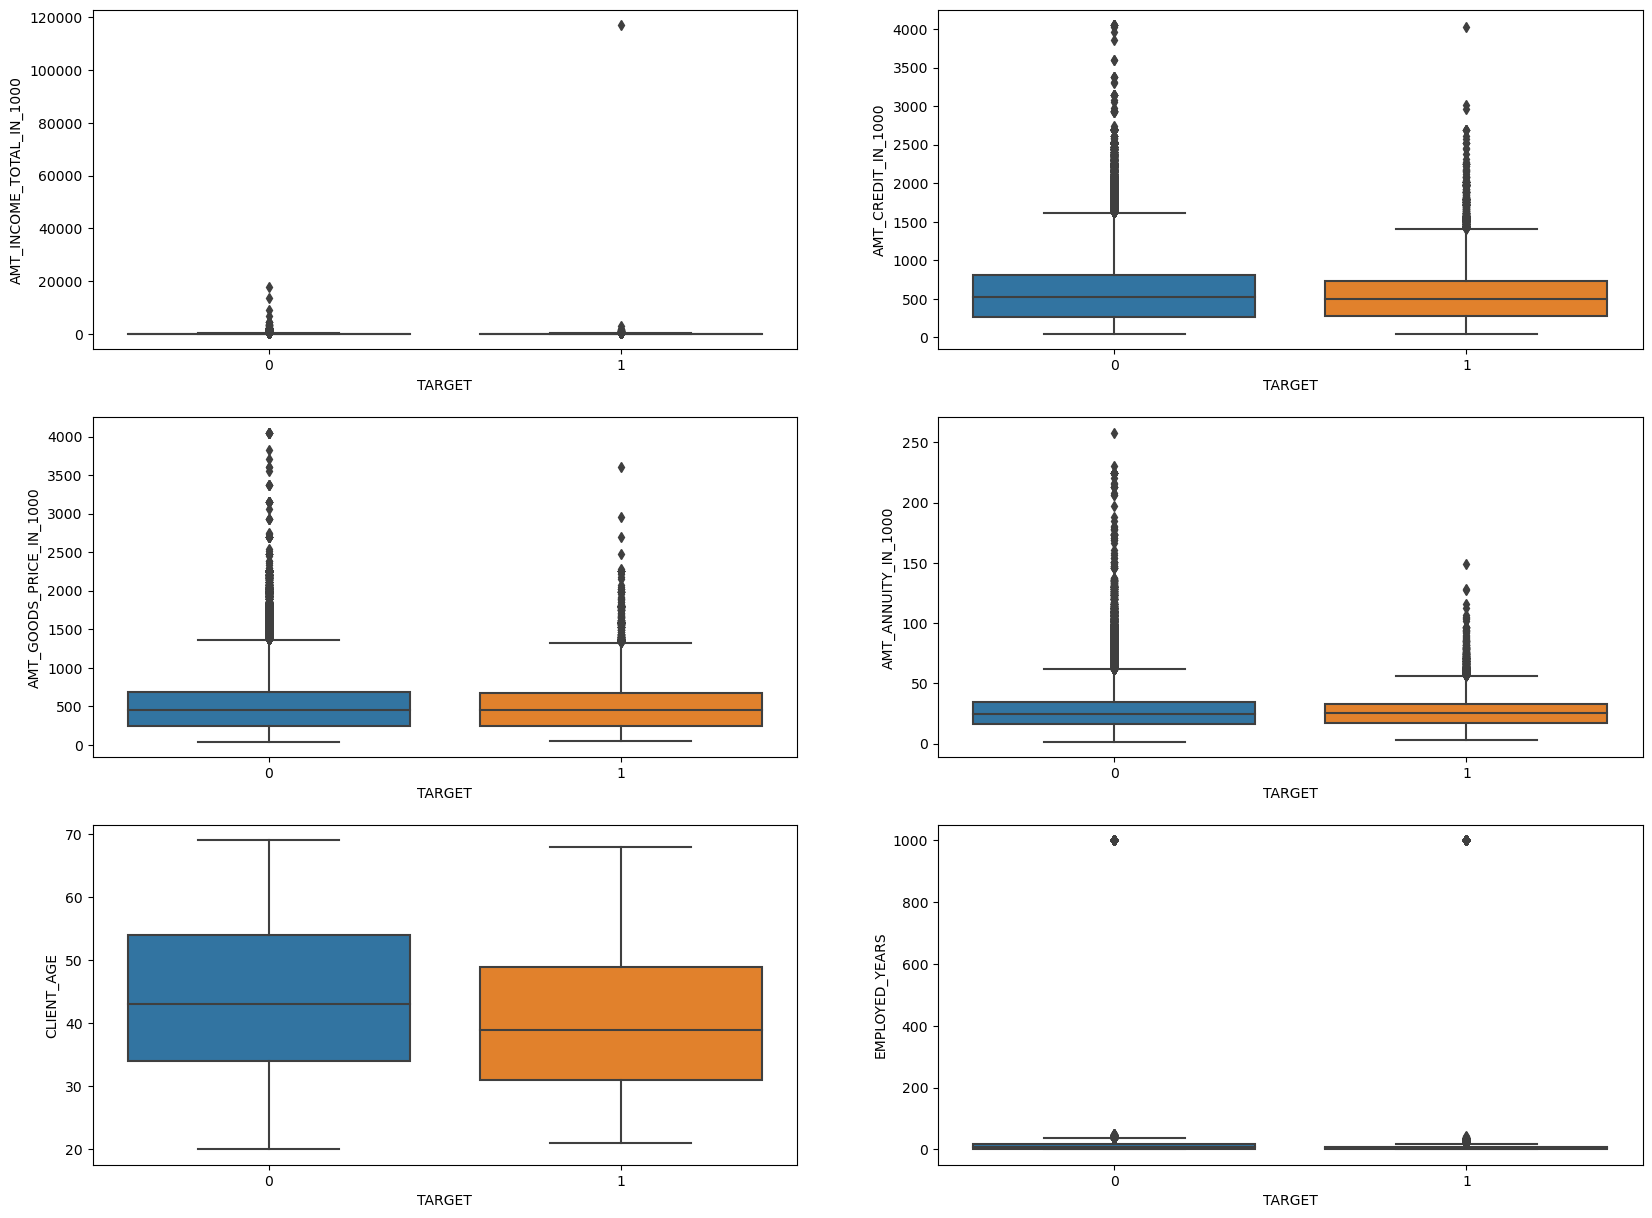

In [42]:
plt.figure(1,figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(data=inp0,x="TARGET",y="AMT_INCOME_TOTAL_IN_1000")

plt.subplot(3,2,2)
sns.boxplot(data=inp0,x="TARGET",y="AMT_CREDIT_IN_1000")

plt.subplot(3,2,3)
sns.boxplot(data=inp0,x="TARGET",y="AMT_GOODS_PRICE_IN_1000")

plt.subplot(3,2,4)
sns.boxplot(data=inp0,x="TARGET",y="AMT_ANNUITY_IN_1000")

plt.subplot(3,2,5)
sns.boxplot(data=inp0,x="TARGET",y="CLIENT_AGE")

plt.subplot(3,2,6)
sns.boxplot(data=inp0,x="TARGET",y="EMPLOYED_YEARS")
plt.show()

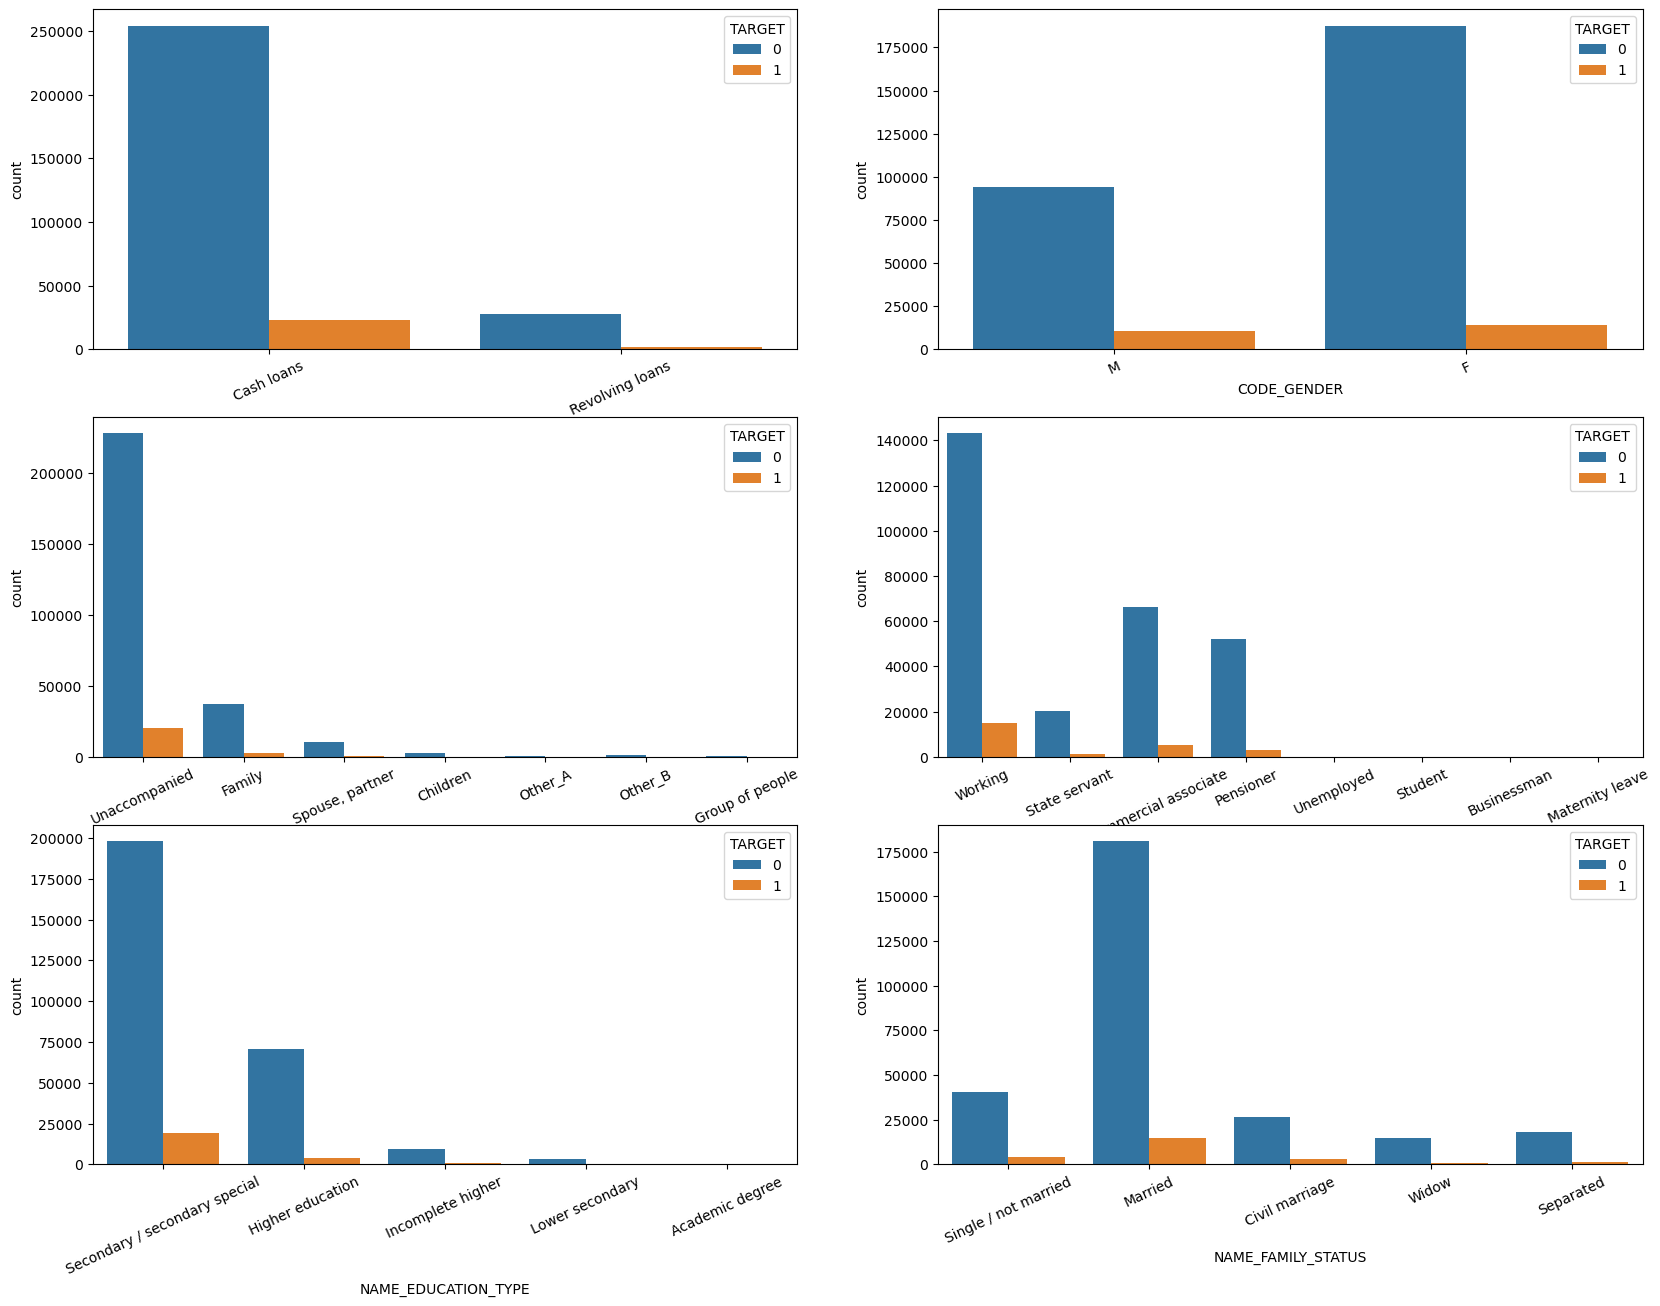

In [56]:
plt.figure(figsize =(20,15))

plt.subplot(3,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE', hue = 'TARGET', data = inp0)
plt.xticks(rotation = 25)

plt.subplot(3,2,2)
sns.countplot(x = 'CODE_GENDER', hue = 'TARGET', data = inp0)
plt.xticks(rotation = 25)

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_TYPE_SUITE', hue = 'TARGET', data = inp0)
plt.xticks(rotation = 25)

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'TARGET', data = inp0)
plt.xticks(rotation = 25)

plt.subplot(3,2,5)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'TARGET', data = inp0)
plt.xticks(rotation = 25)

plt.subplot(3,2,6)
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'TARGET', data = inp0)
plt.xticks(rotation = 25)
plt.show()

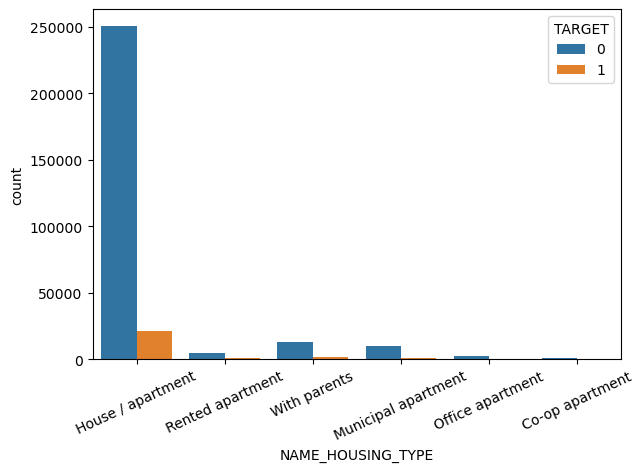

In [66]:
plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
sns.countplot(x = 'NAME_HOUSING_TYPE', hue = 'TARGET', data = inp0)
plt.xticks(rotation = 25)
plt.show()


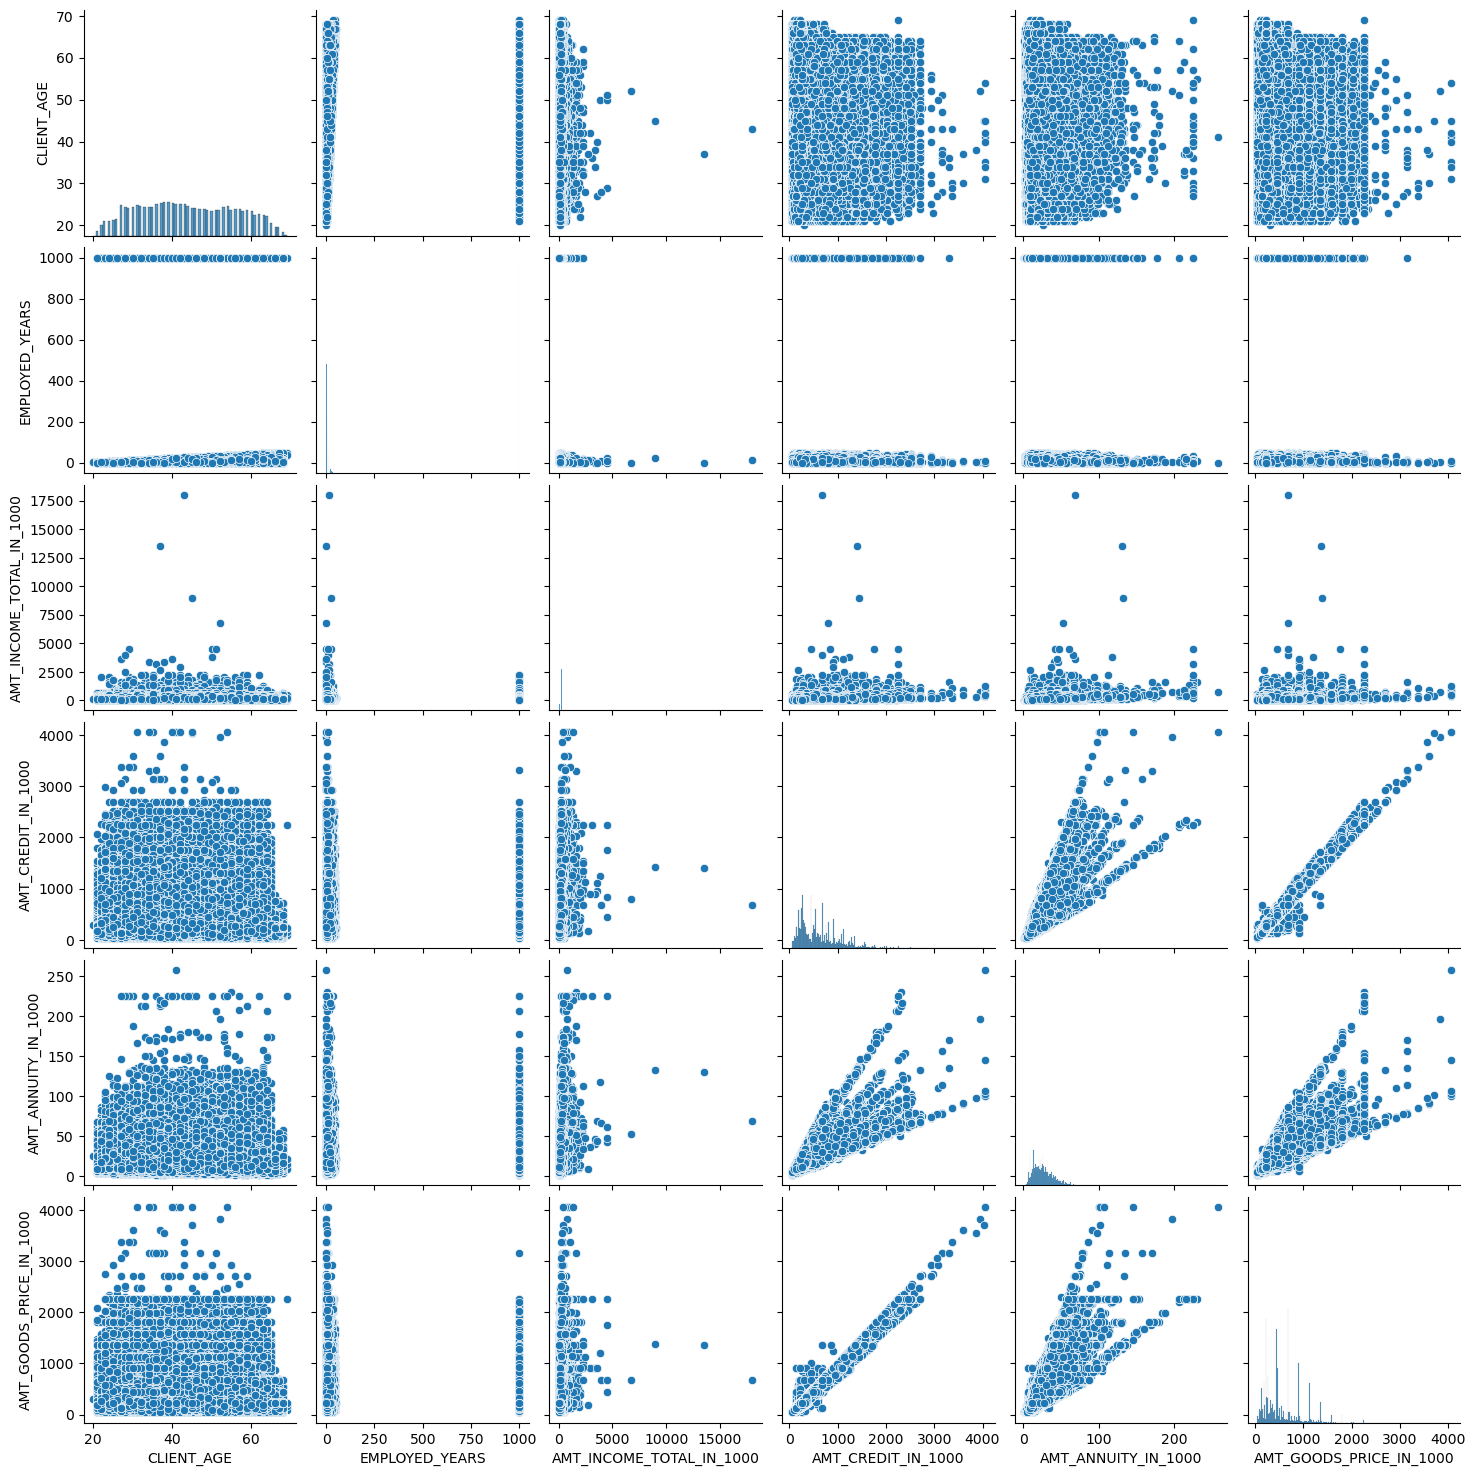

In [75]:
sns.pairplot(data=inp_0,vars=['CLIENT_AGE','EMPLOYED_YEARS','AMT_INCOME_TOTAL_IN_1000','AMT_CREDIT_IN_1000','AMT_ANNUITY_IN_1000','AMT_GOODS_PRICE_IN_1000'])
plt.show()

In [76]:
inp1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
merg_df = pd.merge(inp0, inp1, how='left', on='SK_ID_CURR')
merg_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,...,TOTAL_INCOME_BANNED_IN_1000,CRDEIT_BANNED_IN_1000,ANNUITY_BANNED_IN_1000,GOODS_PRICE_BANNED_IN_1000,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,...,"(200.0, 300.0]","(400.0, 600.0]","(20.0, 30.0]","(200.0, 400.0]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,...,"(200.0, 300.0]","(1000.0, inf]","(30.0, 40.0]","(1000.0, inf]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,...,"(200.0, 300.0]","(1000.0, inf]","(30.0, 40.0]","(1000.0, inf]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,...,"(200.0, 300.0]","(1000.0, inf]","(30.0, 40.0]","(1000.0, inf]",2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1

In [81]:
merg_df.dtypes

SK_ID_CURR                        object
TARGET                            object
NAME_CONTRACT_TYPE_x              object
CODE_GENDER                       object
FLAG_OWN_CAR                      object
FLAG_OWN_REALTY                   object
CNT_CHILDREN                      object
AMT_INCOME_TOTAL                 float64
AMT_CREDIT_x                     float64
AMT_ANNUITY_x                    float64
AMT_GOODS_PRICE_x                float64
NAME_TYPE_SUITE_x                 object
NAME_INCOME_TYPE                  object
NAME_EDUCATION_TYPE               object
NAME_FAMILY_STATUS                object
NAME_HOUSING_TYPE                 object
REGION_POPULATION_RELATIVE       float64
DAYS_BIRTH                         int64
DAYS_EMPLOYED                      int64
DAYS_REGISTRATION                float64
DAYS_ID_PUBLISH                    int64
FLAG_MOBIL                        object
FLAG_EMP_PHONE                    object
FLAG_WORK_PHONE                   object
FLAG_CONT_MOBILE

In [82]:
merg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1426891 entries, 0 to 1426890
Columns: 120 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(6), float64(34), int64(4), object(76)
memory usage: 1.2+ GB


In [83]:
cols = merg_df.columns[round(100*(merg_df.isnull().sum()/len(merg_df.index)),2) >= 30.00]
merg_df.drop(cols,axis=1,inplace=True)
round(100*(merg_df.isnull().sum()/len(merg_df.index)),2).sort_values(ascending=False)

AMT_GOODS_PRICE_y               23.51
AMT_ANNUITY_y                   22.64
CNT_PAYMENT                     22.64
EXT_SOURCE_3                    17.16
AMT_REQ_CREDIT_BUREAU_YEAR      11.58
AMT_REQ_CREDIT_BUREAU_QRT       11.58
AMT_REQ_CREDIT_BUREAU_MON       11.58
AMT_REQ_CREDIT_BUREAU_WEEK      11.58
AMT_REQ_CREDIT_BUREAU_DAY       11.58
AMT_REQ_CREDIT_BUREAU_HOUR      11.58
PRODUCT_COMBINATION              1.17
AMT_APPLICATION                  1.15
CHANNEL_TYPE                     1.15
NAME_PORTFOLIO                   1.15
NAME_GOODS_CATEGORY              1.15
SELLERPLACE_AREA                 1.15
NAME_SELLER_INDUSTRY             1.15
NAME_YIELD_GROUP                 1.15
CODE_REJECT_REASON               1.15
SK_ID_PREV                       1.15
NAME_CONTRACT_TYPE_y             1.15
NAME_CLIENT_TYPE                 1.15
NAME_PRODUCT_TYPE                1.15
AMT_CREDIT_y                     1.15
WEEKDAY_APPR_PROCESS_START_y     1.15
HOUR_APPR_PROCESS_START_y        1.15
FLAG_LAST_AP

In [84]:
merg_df.describe()

,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,CLIENT_AGE,EMPLOYED_YEARS,AMT_INCOME_TOTAL_IN_1000,AMT_CREDIT_IN_1000,AMT_ANNUITY_IN_1000,AMT_GOODS_PRICE_IN_1000,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.182032e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.426891e+06,1.410528e+06,1.103774e+06,1.410528e+06,1.410527e+06,1.091499e+06,1.410528e+06,1.410528e+06,1.410528e+06,1.410528e+06,1.103779e+06
mean,1.736708e+05,5.897466e+05,2.705868e+04,5.295896e+05,2.079080e-02,1.631574e+04,7.257341e+04,5.000701e+03,3.034531e+03,5.117640e-01,4.900158e-01,1.076652e+03,4.419928e+01,1.983032e+02,1.736708e+02,5.897466e+02,2.705868e+01,5.295896e+02,1.922744e+06,1.584084e+04,1.753000e+05,1.964019e+05,2.265700e+05,1.247873e+01,9.964439e-01,-8.803028e+02,3.149044e+02,1.605629e+01
std,1.985180e+05,3.875342e+05,1.404160e+04,3.558597e+05,1.339834e-02,4.346483e+03,1.432706e+05,3.551365e+03,1.507232e+03,1.910840e-01,1.965448e-01,8.038299e+02,1.190745e+01,3.924549e+02,1.985180e+02,3.875342e+02,1.404160e+01,3.558597e+02,5.326849e+05,1.472754e+04,2.937059e+05,3.195620e+05,3.160419e+05,3.331680e+00,5.952707e-02,7.835913e+02,7.703184e+03,1.457080e+01
min,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,8.173617e-08,5.272652e-04,0.000000e+00,2.000000e+01,0.000000e+00,2.565000e+01,4.500000e+01,1.615500e+00,4.050000e+01,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.125000e+05,2.701260e+05,1.682100e+04,2.385000e+05,1.003200e-02,1.273000e+04,1.036000e+03,1.996000e+03,1.783000e+03,3.896195e-01,3.441550e-01,3.830000e+02,3.400000e+01,2.000000e+00,1.125000e+02,2.701260e+02,1.682100e+01,2.385000e+02,1.461392e+06,6.258330e+03,1.971135e+04,2.485800e+04,4.985550e+04,1.000000e+01,1.000000e+00,-1.313000e+03,-1.000000e+00,6.000000e+00
50%,1.575000e+05,5.084955e+05,2.493450e+04,4.500000e+05,1.885000e-02,1.603800e+04,2.395000e+03,4.506000e+03,3.330000e+03,5.630800e-01,5.100895e-01,9.960000e+02,4.300000e+01,6.000000e+00,1.575000e+02,5.084955e+02,2.493450e+01,4.500000e+02,1.922678e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.102500e+05,1.200000e+01,1.000000e+00,-5.820000e+02,4.000000e+00,1.200000e+01
75%,2.115000e+05,8.086500e+05,3.457800e+04,6.795000e+05,2.866300e-02,1.997500e+04,6.306000e+03,7.507000e+03,4.319000e+03,6.610054e-01,6.496203e-01,1.679000e+03,5.400000e+01,1.700000e+01,2.115000e+02,8.086500e+02,3.457800e+01,6.795000e+02,2.383941e+06,2.044125e+04,1.800000e+05,2.156400e+05,2.295000e+05,1.500000e+01,1.000000e+00,-2.710000e+02,8.500000e+01,2.400000e+01
max,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,7.250800e-02,2.522900e+04,3.652430e+05,2.467200e+04,7.197000e+03,8.549997e-01,8.960095e-01,4.292000e+03,6.900000e+01,1.000000e+03,1.170000e+05,4.050000e+03,2.580255e+02,4.050000e+03,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,5.850000e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


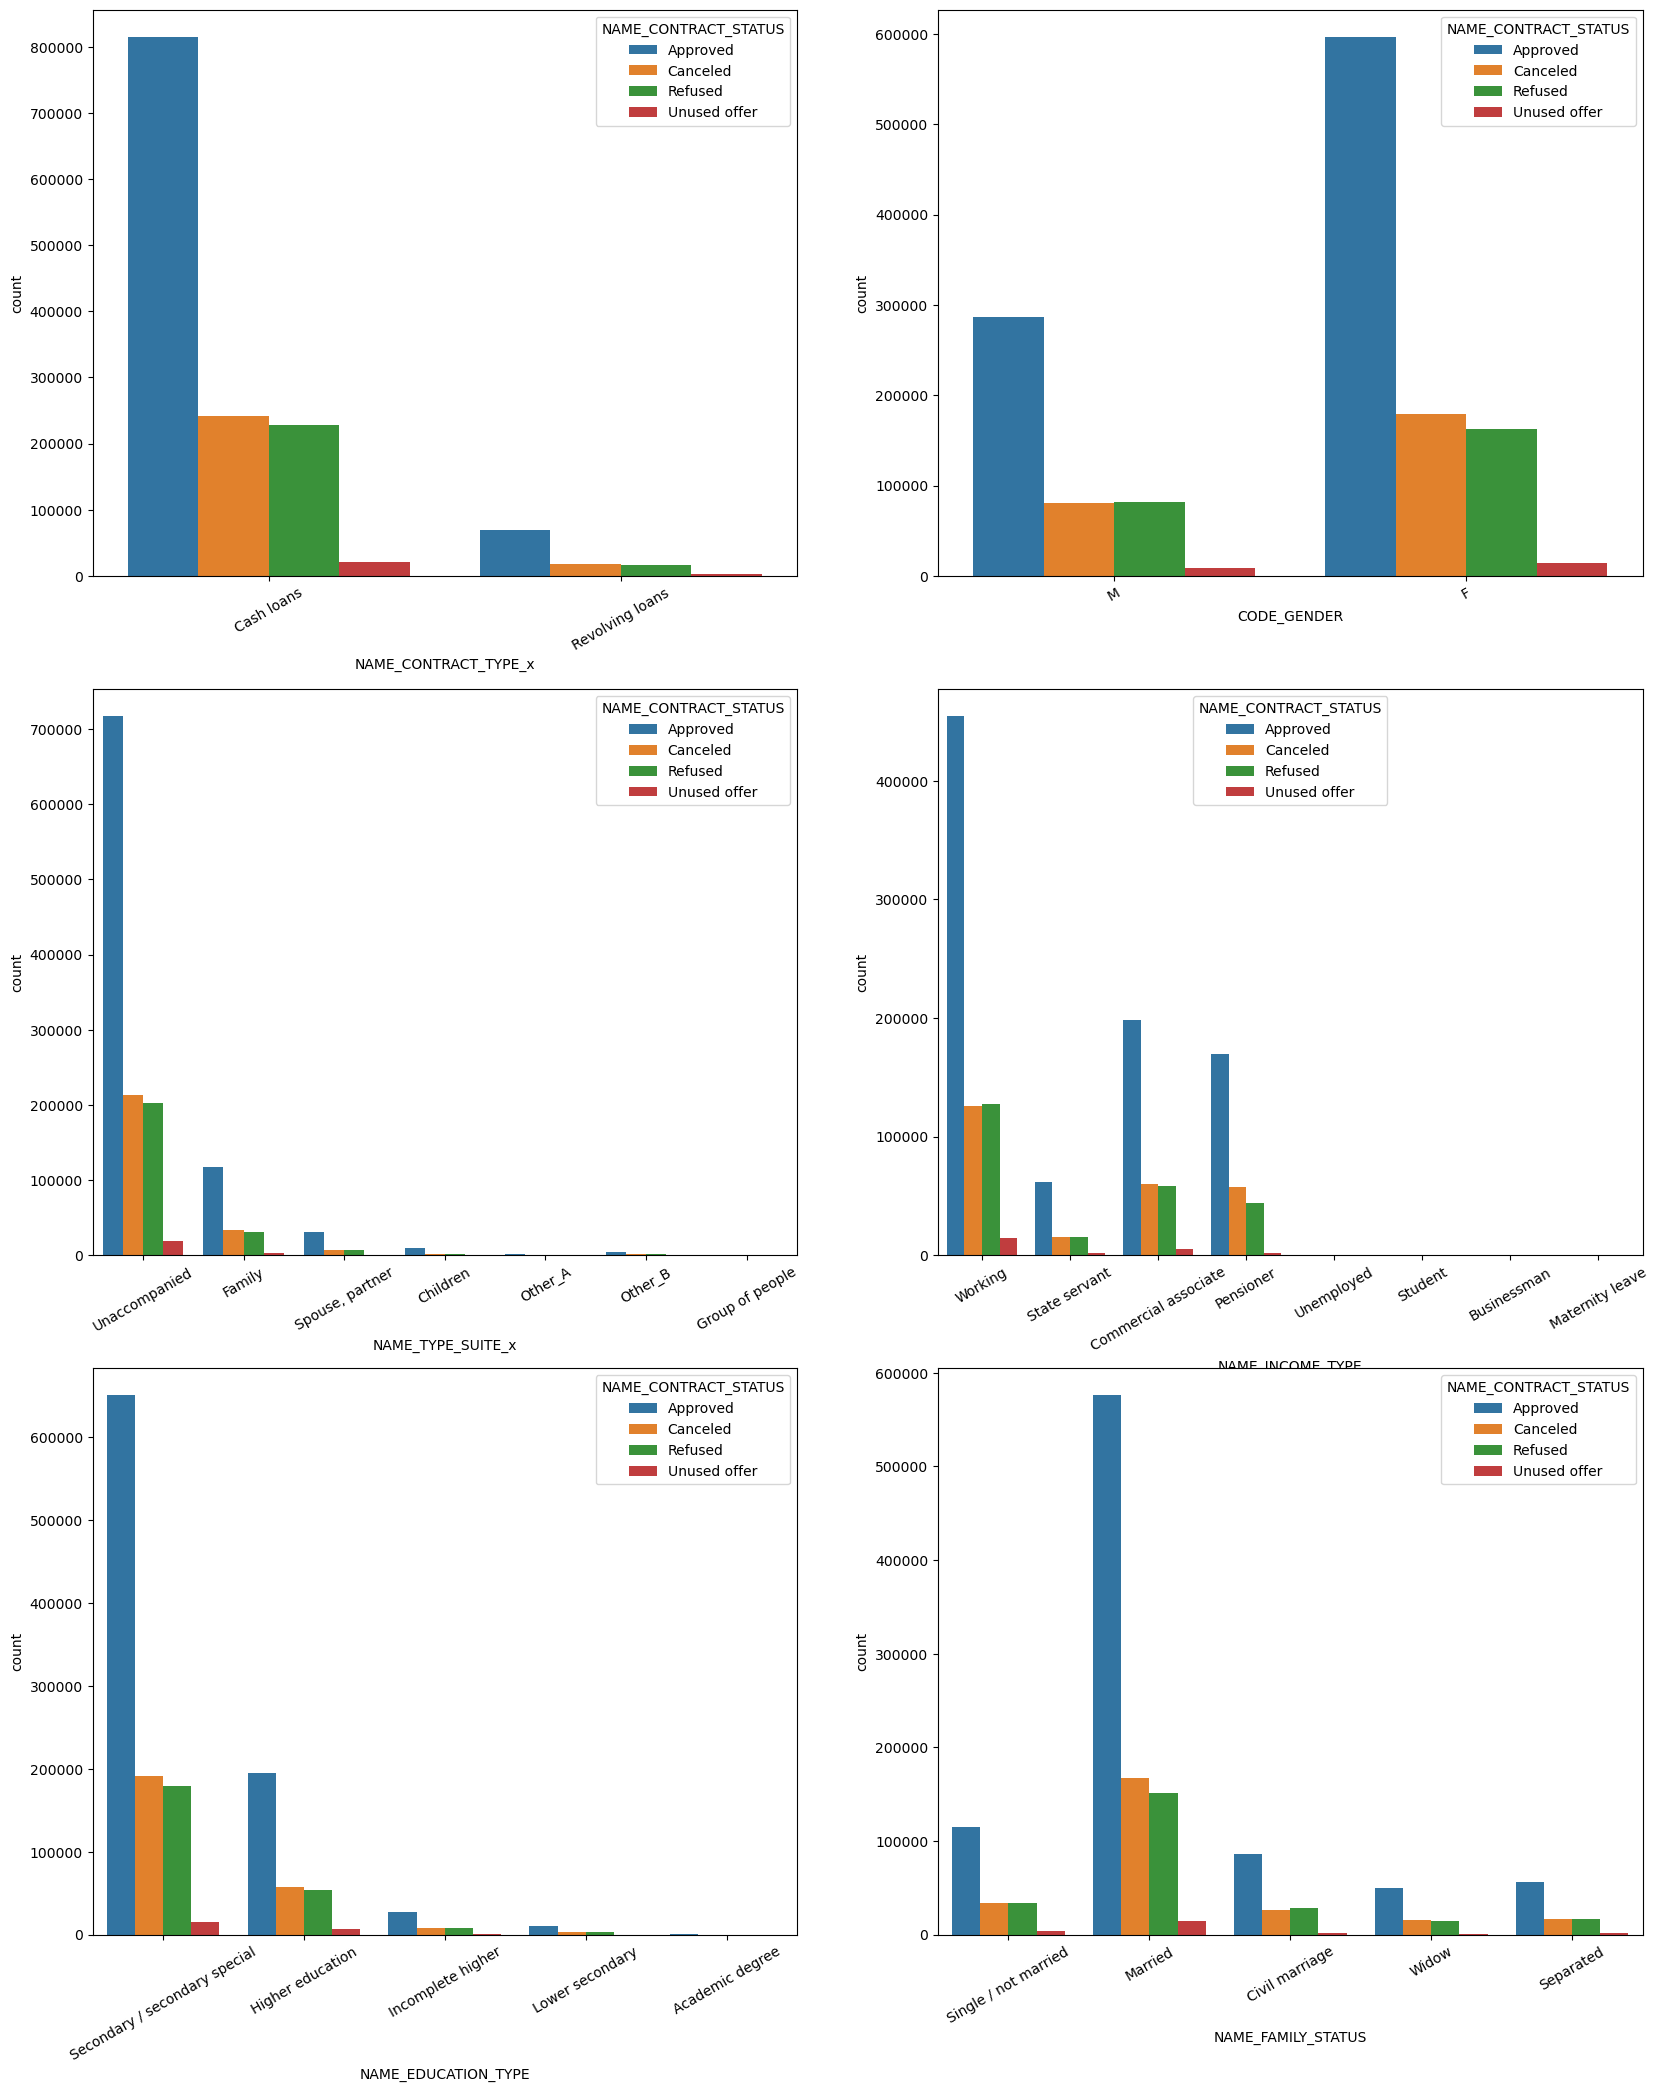

In [89]:
plt.figure(figsize = (20,25))
plt.subplot(3,2,1)
sns.countplot(x = 'NAME_CONTRACT_TYPE_x', hue = 'NAME_CONTRACT_STATUS', data = merg_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,2)
sns.countplot(x = 'CODE_GENDER', hue = 'NAME_CONTRACT_STATUS', data = merg_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,3)
sns.countplot(x = 'NAME_TYPE_SUITE_x', hue = 'NAME_CONTRACT_STATUS', data = merg_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,4)
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_CONTRACT_STATUS', data = merg_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,5)
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_STATUS', data = merg_df)
plt.xticks(rotation = 30)

plt.subplot(3,2,6)
sns.countplot(x = 'NAME_FAMILY_STATUS', hue = 'NAME_CONTRACT_STATUS', data = merg_df)
plt.xticks(rotation = 30)
plt.show()

## Loan refused rate

#### Results shows that working people who are either single or married had refused loan and they are on the higher side of refusal part


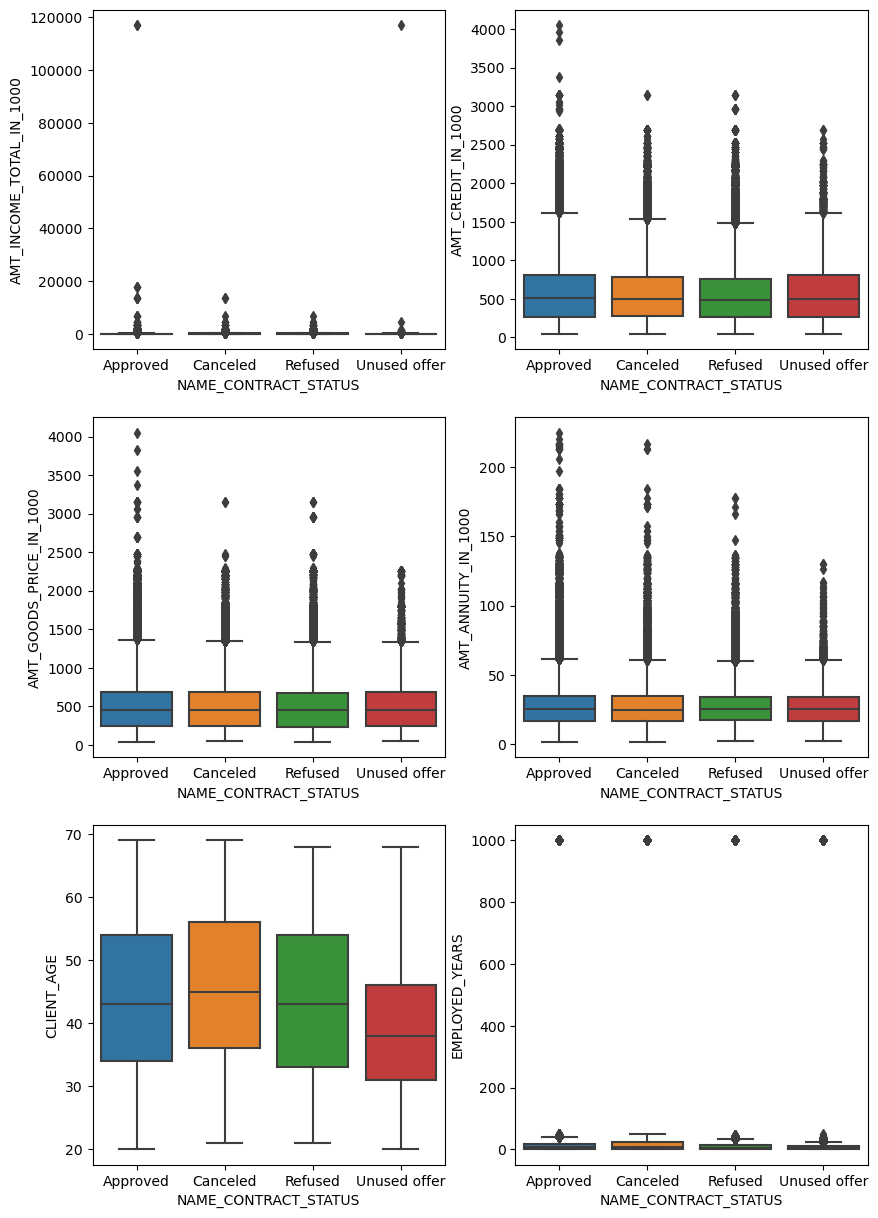

In [92]:
plt.figure(1,figsize=(10,15))
plt.subplot(3,2,1)
sns.boxplot(data=merg_df,x="NAME_CONTRACT_STATUS",y="AMT_INCOME_TOTAL_IN_1000")
plt.subplot(3,2,2)
sns.boxplot(data=merg_df,x="NAME_CONTRACT_STATUS",y="AMT_CREDIT_IN_1000")
plt.subplot(3,2,3)
sns.boxplot(data=merg_df,x="NAME_CONTRACT_STATUS",y="AMT_GOODS_PRICE_IN_1000")
plt.subplot(3,2,4)
sns.boxplot(data=merg_df,x="NAME_CONTRACT_STATUS",y="AMT_ANNUITY_IN_1000")
plt.subplot(3,2,5)
sns.boxplot(data=merg_df,x="NAME_CONTRACT_STATUS",y="CLIENT_AGE")
plt.subplot(3,2,6)
sns.boxplot(data=merg_df,x="NAME_CONTRACT_STATUS",y="EMPLOYED_YEARS")
plt.show()

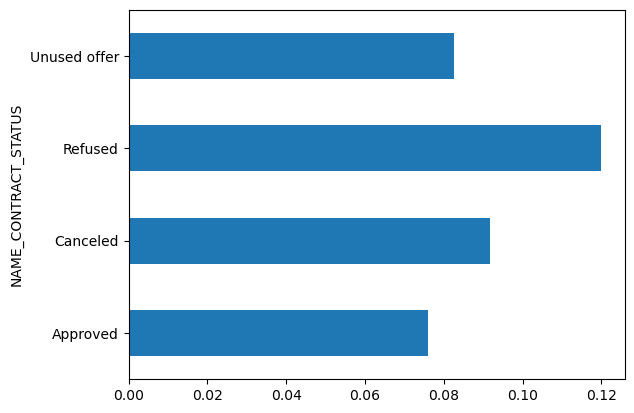

In [94]:
merg_df['TARGET'] = merg_df['TARGET'].astype(int)
merg_df.groupby("NAME_CONTRACT_STATUS")["TARGET"].mean().plot.barh()
plt.show()

### Heat map

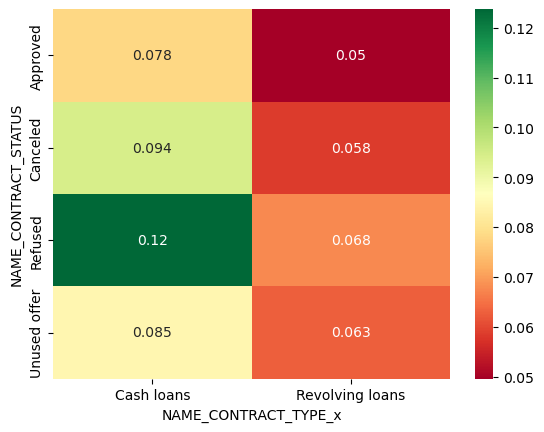

In [97]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="NAME_CONTRACT_TYPE_x",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

##### Females should be given more prefernce than males 

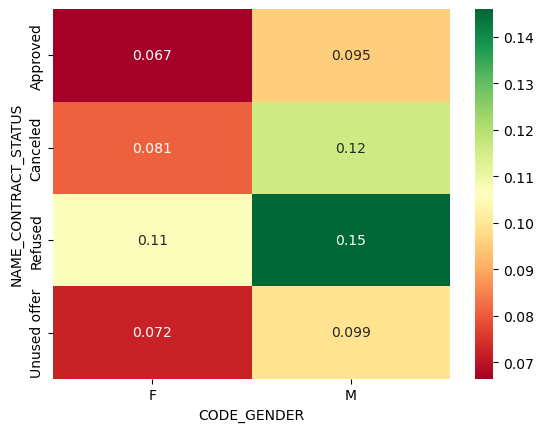

In [98]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="CODE_GENDER",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

##### Widows should be given more preference in sanctioning loans than unmarried and civil married  

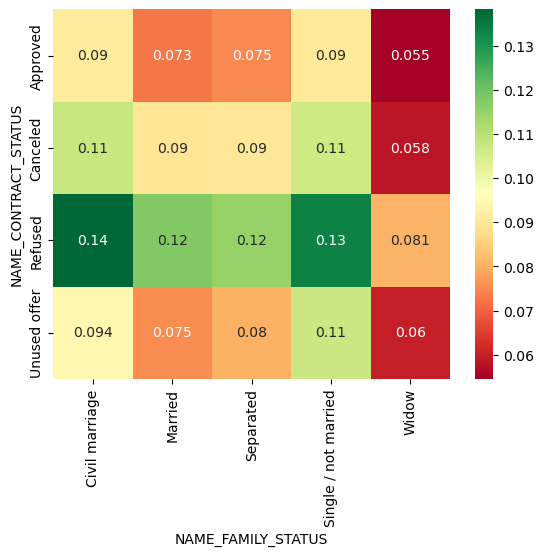

In [99]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="NAME_FAMILY_STATUS",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

##### Client's completed education till lower secondary should be avoided

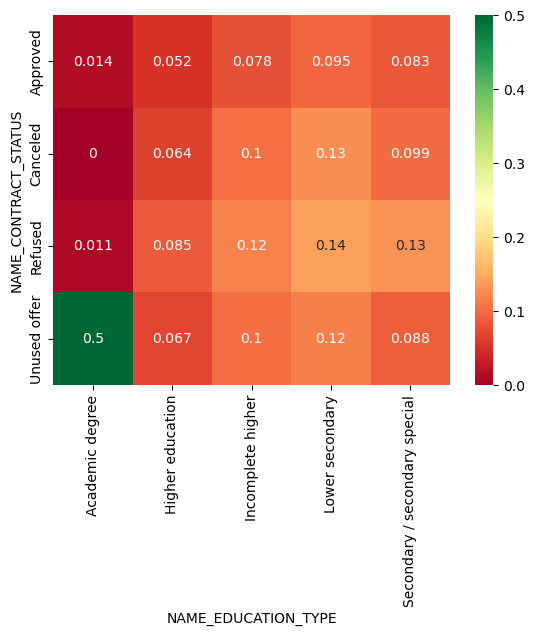

In [100]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="NAME_EDUCATION_TYPE",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

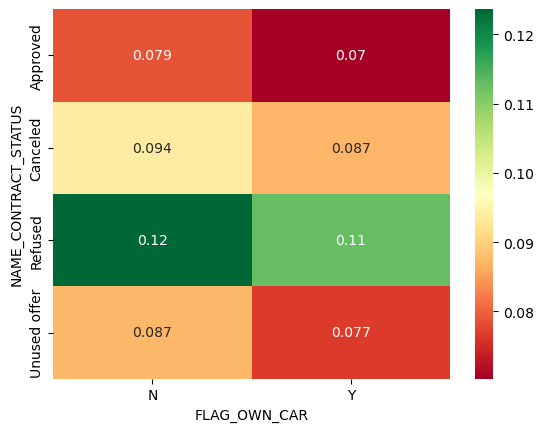

In [101]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="FLAG_OWN_CAR",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

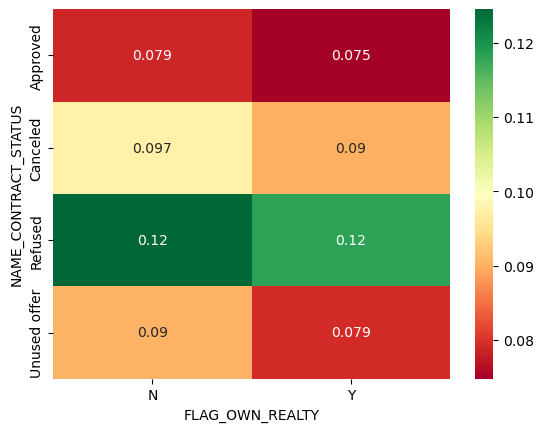

In [103]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="FLAG_OWN_REALTY",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

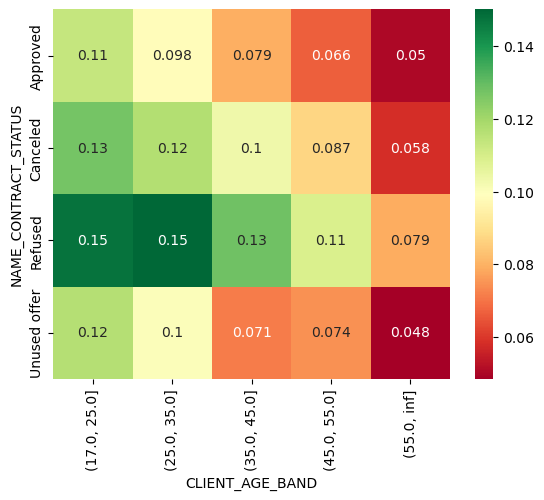

In [104]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="CLIENT_AGE_BAND",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

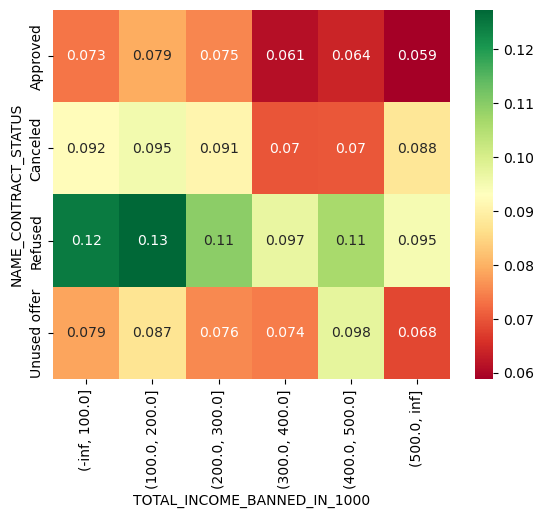

In [105]:
res = pd.pivot_table(data=merg_df,index="NAME_CONTRACT_STATUS",columns="TOTAL_INCOME_BANNED_IN_1000",values="TARGET")
sns.heatmap(res,annot=True,cmap="RdYlGn")
plt.show()

#### RECOMMENDATION FOR THE BANK

#### Sanctioning revolving loans are better option than cash loans as they are helpful to hedge the risk of cash loans.
#### Avoid sanctioning loans to the age group of 17 to 35 and to sanction more loans to the age band of 55 and above.
#### Client's completed education till lower secondary should be avoided.
#### Avoid sanctioning loans to clients whose applications were rejected earlier.